# **Telecom X - Análisis de Evasión de Clientes**

Has sido contratado como asistente de análisis de datos en Telecom X y formarás parte del proyecto "Churn de Clientes". La empresa enfrenta una alta tasa de cancelaciones y necesita comprender los factores que llevan a la pérdida de clientes.

Telecom X es una empresa de telecomunicaciones y está enfrentando un alto índice de evasión de clientes y aún no han identificado el problema de esta evasión. Para ello, te han proporcionado algunos datos en los que tendrás que buscar, tratar y realizar un análisis exploratorio para, una vez limpiados estos datos, poder proporcionárselos al equipo de ciencia de datos. De esta manera, podrán realizar un análisis predictivo y determinar de dónde proviene esta evasión de clientes.

Durante este challenge se practicará:

* Importar y manipular datos desde una API de manera eficiente.
* Aplicar los conceptos de ETL (Extracción, Transformación y Carga) en la preparación de los datos.
* Crear visualizaciones estratégicas para identificar patrones y tendencias.
* Realizar un Análisis Exploratorio de Datos (EDA) y generar un informe con insights relevantes.



##📌 Extracción`

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import requests
from io import StringIO


In [2]:
# Extracción de datos.
url = "https://raw.githubusercontent.com/28Rene13/Challenge_TelecomX/main/TelecomX_Data.json"
response = requests.get(url)
data = response.json()

# Convertir a DataFrame
df = pd.DataFrame(data)

In [3]:
#Mostrar primeras 5 filas.
df.head()

,customerID,Churn,customer,phone,internet,account
0,0002-ORFBO,No,"{'gender': 'Female', 'SeniorCitizen': 0, 'Part...","{'PhoneService': 'Yes', 'MultipleLines': 'No'}","{'InternetService': 'DSL', 'OnlineSecurity': '...","{'Contract': 'One year', 'PaperlessBilling': '..."
1,0003-MKNFE,No,"{'gender': 'Male', 'SeniorCitizen': 0, 'Partne...","{'PhoneService': 'Yes', 'MultipleLines': 'Yes'}","{'InternetService': 'DSL', 'OnlineSecurity': '...","{'Contract': 'Month-to-month', 'PaperlessBilli..."
2,0004-TLHLJ,Yes,"{'gender': 'Male', 'SeniorCitizen': 0, 'Partne...","{'PhoneService': 'Yes', 'MultipleLines': 'No'}","{'InternetService': 'Fiber optic', 'OnlineSecu...","{'Contract': 'Month-to-month', 'PaperlessBilli..."
3,0011-IGKFF,Yes,"{'gender': 'Male', 'SeniorCitizen': 1, 'Partne...","{'PhoneService': 'Yes', 'MultipleLines': 'No'}","{'InternetService': 'Fiber optic', 'OnlineSecu...","{'Contract': 'Month-to-month', 'PaperlessBilli..."
4,0013-EXCHZ,Yes,"{'gender': 'Female', 'SeniorCitizen': 1, 'Part...","{'PhoneService': 'Yes', 'MultipleLines': 'No'}","{'InternetService': 'Fiber optic', 'OnlineSecu...","{'Contract': 'Month-to-month', 'PaperlessBilli..."


In [4]:
# Mostrar información del DataFrame
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7267 entries, 0 to 7266
Data columns (total 6 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   customerID  7267 non-null   object
 1   Churn       7267 non-null   object
 2   customer    7267 non-null   object
 3   phone       7267 non-null   object
 4   internet    7267 non-null   object
 5   account     7267 non-null   object
dtypes: object(6)
memory usage: 340.8+ KB


##🔧 Transformación

 Esta etapa ayudará a identificar qué variables son más relevantes para el análisis de evasión de clientes y comprender la estructura del dataset y el significado de sus columnas.

Para facilitar este proceso, se tiene a continuacion la descripción de cada columna.


- `customerID`: número de identificación único de cada cliente
- `Churn`: si el cliente dejó o no la empresa
- `gender`: género (masculino y femenino)
- `SeniorCitizen`: información sobre si un cliente tiene o no una edad igual o mayor a 65 años
- `Partner`: si el cliente tiene o no una pareja
- `Dependents`: si el cliente tiene o no dependientes
- `tenure`: meses de contrato del cliente
- `PhoneService`: suscripción al servicio telefónico
- `MultipleLines`: suscripción a más de una línea telefónica
- `InternetService`: suscripción a un proveedor de internet
- `OnlineSecurity`: suscripción adicional de seguridad en línea
- `OnlineBackup`: suscripción adicional de respaldo en línea
- `DeviceProtection`: suscripción adicional de protección del dispositivo
- `TechSupport`: suscripción adicional de soporte técnico, menor tiempo de espera
- `StreamingTV`: suscripción de televisión por cable
- `StreamingMovies`: suscripción de streaming de películas
- `Contract`: tipo de contrato
- `PaperlessBilling`: si el cliente prefiere recibir la factura en línea
- `PaymentMethod`: forma de pago
- `Charges.Monthly`: total de todos los servicios del cliente por mes
- `Charges.Total`: total gastado por el cliente

In [5]:
# Normalizamos el DataFrame
df2 = df.copy()
df2 = pd.json_normalize(data, sep='_')
df2.head()


,customerID,Churn,customer_gender,customer_SeniorCitizen,customer_Partner,customer_Dependents,customer_tenure,phone_PhoneService,phone_MultipleLines,internet_InternetService,...,internet_OnlineBackup,internet_DeviceProtection,internet_TechSupport,internet_StreamingTV,internet_StreamingMovies,account_Contract,account_PaperlessBilling,account_PaymentMethod,account_Charges_Monthly,account_Charges_Total
0,0002-ORFBO,No,Female,0,Yes,Yes,9,Yes,No,DSL,...,Yes,No,Yes,Yes,No,One year,Yes,Mailed check,65.6,593.3
1,0003-MKNFE,No,Male,0,No,No,9,Yes,Yes,DSL,...,No,No,No,No,Yes,Month-to-month,No,Mailed check,59.9,542.4
2,0004-TLHLJ,Yes,Male,0,No,No,4,Yes,No,Fiber optic,...,No,Yes,No,No,No,Month-to-month,Yes,Electronic check,73.9,280.85
3,0011-IGKFF,Yes,Male,1,Yes,No,13,Yes,No,Fiber optic,...,Yes,Yes,No,Yes,Yes,Month-to-month,Yes,Electronic check,98.0,1237.85
4,0013-EXCHZ,Yes,Female,1,Yes,No,3,Yes,No,Fiber optic,...,No,No,Yes,Yes,No,Month-to-month,Yes,Mailed check,83.9,267.4


In [6]:
# Mostrar información del nuevo DataFrame
df2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7267 entries, 0 to 7266
Data columns (total 21 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   customerID                 7267 non-null   object 
 1   Churn                      7267 non-null   object 
 2   customer_gender            7267 non-null   object 
 3   customer_SeniorCitizen     7267 non-null   int64  
 4   customer_Partner           7267 non-null   object 
 5   customer_Dependents        7267 non-null   object 
 6   customer_tenure            7267 non-null   int64  
 7   phone_PhoneService         7267 non-null   object 
 8   phone_MultipleLines        7267 non-null   object 
 9   internet_InternetService   7267 non-null   object 
 10  internet_OnlineSecurity    7267 non-null   object 
 11  internet_OnlineBackup      7267 non-null   object 
 12  internet_DeviceProtection  7267 non-null   object 
 13  internet_TechSupport       7267 non-null   objec

In [7]:
# Verificar valores nulos
df2.isnull().sum()

,0
customerID,0
Churn,0
customer_gender,0
customer_SeniorCitizen,0
customer_Partner,0
customer_Dependents,0
customer_tenure,0
phone_PhoneService,0
phone_MultipleLines,0
internet_InternetService,0


In [8]:
# Verificar duplicados
df2.duplicated().sum()

np.int64(0)

In [9]:
# Revisar tipo de datos
df2.dtypes

,0
customerID,object
Churn,object
customer_gender,object
customer_SeniorCitizen,int64
customer_Partner,object
customer_Dependents,object
customer_tenure,int64
phone_PhoneService,object
phone_MultipleLines,object
internet_InternetService,object


In [10]:
# 'account_Charges_Total' es texto, convertir a numérico (puede contener vacíos)
df2['account_Charges_Total'] = pd.to_numeric(df2['account_Charges_Total'], errors='coerce')

# Revisar tipo de datos
df2.dtypes

,0
customerID,object
Churn,object
customer_gender,object
customer_SeniorCitizen,int64
customer_Partner,object
customer_Dependents,object
customer_tenure,int64
phone_PhoneService,object
phone_MultipleLines,object
internet_InternetService,object


In [11]:
# Eliminar duplicados
df2 = df2.drop_duplicates()

In [12]:
# Rellenar nulos en 'account_Charges_Total' con 0
df2['account_Charges_Total'] = df2['account_Charges_Total'].fillna(0)

In [13]:
# Eliminar registros sin valor válido en la variable objetivo ('Churn')
df2 = df2[df2['Churn'].isin(['Yes', 'No'])]

In [14]:
# Crear columna de cuentas diarias
df2['Cuentas_Diarias'] = df2['account_Charges_Monthly'] / 30

df2.head()

,customerID,Churn,customer_gender,customer_SeniorCitizen,customer_Partner,customer_Dependents,customer_tenure,phone_PhoneService,phone_MultipleLines,internet_InternetService,...,internet_DeviceProtection,internet_TechSupport,internet_StreamingTV,internet_StreamingMovies,account_Contract,account_PaperlessBilling,account_PaymentMethod,account_Charges_Monthly,account_Charges_Total,Cuentas_Diarias
0,0002-ORFBO,No,Female,0,Yes,Yes,9,Yes,No,DSL,...,No,Yes,Yes,No,One year,Yes,Mailed check,65.6,593.30,2.186667
1,0003-MKNFE,No,Male,0,No,No,9,Yes,Yes,DSL,...,No,No,No,Yes,Month-to-month,No,Mailed check,59.9,542.40,1.996667
2,0004-TLHLJ,Yes,Male,0,No,No,4,Yes,No,Fiber optic,...,Yes,No,No,No,Month-to-month,Yes,Electronic check,73.9,280.85,2.463333
3,0011-IGKFF,Yes,Male,1,Yes,No,13,Yes,No,Fiber optic,...,Yes,No,Yes,Yes,Month-to-month,Yes,Electronic check,98.0,1237.85,3.266667
4,0013-EXCHZ,Yes,Female,1,Yes,No,3,Yes,No,Fiber optic,...,No,Yes,Yes,No,Month-to-month,Yes,Mailed check,83.9,267.40,2.796667


In [15]:
# Convertir columnas Yes/No a 1/0 para facilitar el análisis
binarias = ['Churn', 'customer_Partner', 'customer_Dependents',
            'phone_PhoneService', 'account_PaperlessBilling']

for col in binarias:
    df2[col] = df2[col].map({'Yes': 1, 'No': 0})

df2.head()

,customerID,Churn,customer_gender,customer_SeniorCitizen,customer_Partner,customer_Dependents,customer_tenure,phone_PhoneService,phone_MultipleLines,internet_InternetService,...,internet_DeviceProtection,internet_TechSupport,internet_StreamingTV,internet_StreamingMovies,account_Contract,account_PaperlessBilling,account_PaymentMethod,account_Charges_Monthly,account_Charges_Total,Cuentas_Diarias
0,0002-ORFBO,0,Female,0,1,1,9,1,No,DSL,...,No,Yes,Yes,No,One year,1,Mailed check,65.6,593.30,2.186667
1,0003-MKNFE,0,Male,0,0,0,9,1,Yes,DSL,...,No,No,No,Yes,Month-to-month,0,Mailed check,59.9,542.40,1.996667
2,0004-TLHLJ,1,Male,0,0,0,4,1,No,Fiber optic,...,Yes,No,No,No,Month-to-month,1,Electronic check,73.9,280.85,2.463333
3,0011-IGKFF,1,Male,1,1,0,13,1,No,Fiber optic,...,Yes,No,Yes,Yes,Month-to-month,1,Electronic check,98.0,1237.85,3.266667
4,0013-EXCHZ,1,Female,1,1,0,3,1,No,Fiber optic,...,No,Yes,Yes,No,Month-to-month,1,Mailed check,83.9,267.40,2.796667


In [16]:
# Renombrar columnas para claridad
df2 = df2.rename(columns={
    'customerID': 'ID_Cliente',
    'Churn': 'Churn',
    'customer_gender': 'Genero',
    'customer_SeniorCitizen': 'EsAdultoMayor',
    'customer_Partner': 'TienePareja',
    'customer_Dependents': 'TieneDependientes',
    'customer_tenure': 'MesesDeAntiguedad',
    'phone_PhoneService': 'ServicioTelefono',
    'phone_MultipleLines': 'MultiplesLineasTelefono',
    'internet_InternetService': 'TipoInternet',
    'internet_OnlineSecurity': 'SeguridadEnLinea',
    'internet_OnlineBackup': 'RespaldoEnLinea',
    'internet_DeviceProtection': 'ProteccionDispositivo',
    'internet_TechSupport': 'SoporteTecnico',
    'internet_StreamingTV': 'TelevisionPorCable',
    'internet_StreamingMovies': 'StreamingPeliculas',
    'account_Contract': 'TipoContrato',
    'account_PaperlessBilling': 'FacturaElectronica',
    'account_PaymentMethod': 'MetodoDePago',
    'account_Charges_Monthly': 'FacturaMensual',
    'account_Charges_Total': 'FacturaTotal'
})

df2.head()

,ID_Cliente,Churn,Genero,EsAdultoMayor,TienePareja,TieneDependientes,MesesDeAntiguedad,ServicioTelefono,MultiplesLineasTelefono,TipoInternet,...,ProteccionDispositivo,SoporteTecnico,TelevisionPorCable,StreamingPeliculas,TipoContrato,FacturaElectronica,MetodoDePago,FacturaMensual,FacturaTotal,Cuentas_Diarias
0,0002-ORFBO,0,Female,0,1,1,9,1,No,DSL,...,No,Yes,Yes,No,One year,1,Mailed check,65.6,593.30,2.186667
1,0003-MKNFE,0,Male,0,0,0,9,1,Yes,DSL,...,No,No,No,Yes,Month-to-month,0,Mailed check,59.9,542.40,1.996667
2,0004-TLHLJ,1,Male,0,0,0,4,1,No,Fiber optic,...,Yes,No,No,No,Month-to-month,1,Electronic check,73.9,280.85,2.463333
3,0011-IGKFF,1,Male,1,1,0,13,1,No,Fiber optic,...,Yes,No,Yes,Yes,Month-to-month,1,Electronic check,98.0,1237.85,3.266667
4,0013-EXCHZ,1,Female,1,1,0,3,1,No,Fiber optic,...,No,Yes,Yes,No,Month-to-month,1,Mailed check,83.9,267.40,2.796667


##📊 Carga y análisis

In [17]:
#Estadisticas generales
df2.describe()

,Churn,EsAdultoMayor,TienePareja,TieneDependientes,MesesDeAntiguedad,ServicioTelefono,FacturaElectronica,FacturaMensual,FacturaTotal,Cuentas_Diarias
count,7043.000000,7043.000000,7043.000000,7043.000000,7043.000000,7043.000000,7043.000000,7043.000000,7043.000000,7043.000000
mean,0.265370,0.162147,0.483033,0.299588,32.371149,0.903166,0.592219,64.761692,2279.734304,2.158723
std,0.441561,0.368612,0.499748,0.458110,24.559481,0.295752,0.491457,30.090047,2266.794470,1.003002
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,18.250000,0.000000,0.608333
25%,0.000000,0.000000,0.000000,0.000000,9.000000,1.000000,0.000000,35.500000,398.550000,1.183333
50%,0.000000,0.000000,0.000000,0.000000,29.000000,1.000000,1.000000,70.350000,1394.550000,2.345000
75%,1.000000,0.000000,1.000000,1.000000,55.000000,1.000000,1.000000,89.850000,3786.600000,2.995000
max,1.000000,1.000000,1.000000,1.000000,72.000000,1.000000,1.000000,118.750000,8684.800000,3.958333


In [18]:
# Estadísticas básicas para variables numéricas numéricas no binarias
numericas = ['FacturaMensual', 'FacturaTotal', 'MesesDeAntiguedad', 'Cuentas_Diarias']

analisis_numerico = df2[numericas].describe().T
analisis_numerico['mediana'] = df2[numericas].median()
analisis_numerico['varianza'] = df2[numericas].var()
analisis_numerico['coef_var'] = (df2[numericas].std() / df2[numericas].mean()).round(2)
analisis_numerico = analisis_numerico.round(2)

print("📊 Análisis Estadístico de Variables Numéricas")
display(analisis_numerico)

📊 Análisis Estadístico de Variables Numéricas


,count,mean,std,min,25%,50%,75%,max,mediana,varianza,coef_var
FacturaMensual,7043.0,64.76,30.09,18.25,35.50,70.35,89.85,118.75,70.35,905.41,0.46
FacturaTotal,7043.0,2279.73,2266.79,0.00,398.55,1394.55,3786.60,8684.80,1394.55,5138357.17,0.99
MesesDeAntiguedad,7043.0,32.37,24.56,0.00,9.00,29.00,55.00,72.00,29.00,603.17,0.76
Cuentas_Diarias,7043.0,2.16,1.00,0.61,1.18,2.34,2.99,3.96,2.34,1.01,0.46


In [19]:
# Estadísticas básicas para variables numéricas binarias
columnas_binarias = ['Churn', 'TienePareja', 'TieneDependientes', 'ServicioTelefono', 'FacturaElectronica']

resumen_binarias = pd.DataFrame({
    'Total registros': len(df2),
    'Cantidad de 1s': df2[columnas_binarias].sum(),
    'Cantidad de 0s': len(df2) - df2[columnas_binarias].sum(),
    'Proporción (%) de 1s': df2[columnas_binarias].mean() * 100
})

resumen_binarias = resumen_binarias[['Cantidad de 1s', 'Cantidad de 0s', 'Proporción (%) de 1s', 'Total registros']]
resumen_binarias = resumen_binarias.round(2)

print("📊 Análisis Estadístico de Variables Binarias")
display(resumen_binarias)

📊 Análisis Estadístico de Variables Binarias


,Cantidad de 1s,Cantidad de 0s,Proporción (%) de 1s,Total registros
Churn,1869,5174,26.54,7043
TienePareja,3402,3641,48.30,7043
TieneDependientes,2110,4933,29.96,7043
ServicioTelefono,6361,682,90.32,7043
FacturaElectronica,4171,2872,59.22,7043


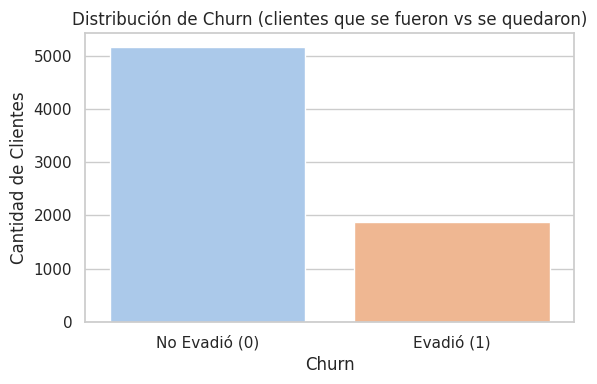

In [20]:
# Estilo para visualizaciones
sns.set(style="whitegrid")
plt.rcParams['figure.figsize'] = (10, 6)

plt.figure(figsize=(6, 4))
sns.countplot(data=df2, x='Churn', hue='Churn', palette='pastel', legend=False)
plt.title('Distribución de Churn (clientes que se fueron vs se quedaron)')
plt.xticks([0, 1], ['No Evadió (0)', 'Evadió (1)'])
plt.ylabel('Cantidad de Clientes')
plt.xlabel('Churn')
plt.tight_layout()
plt.show();

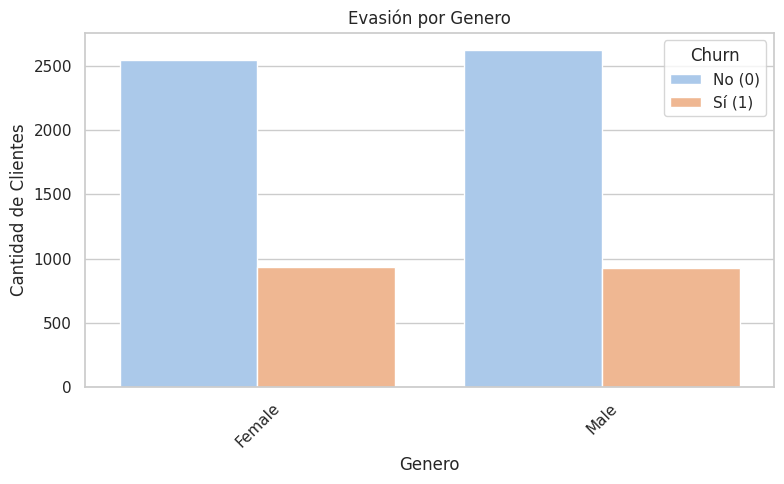

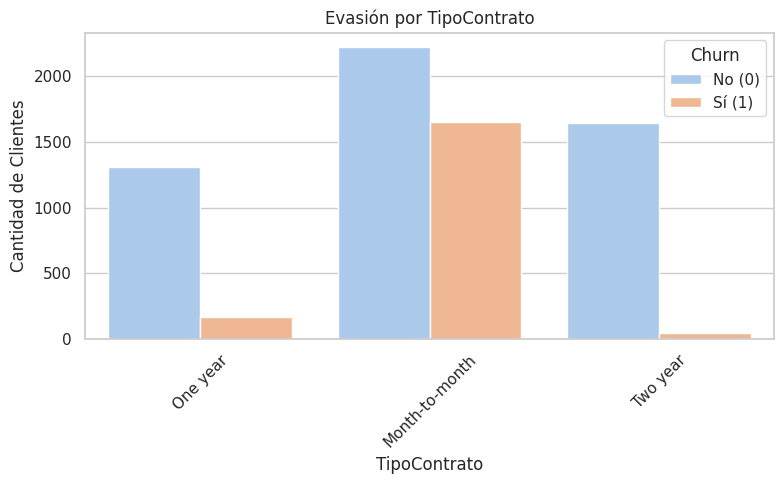

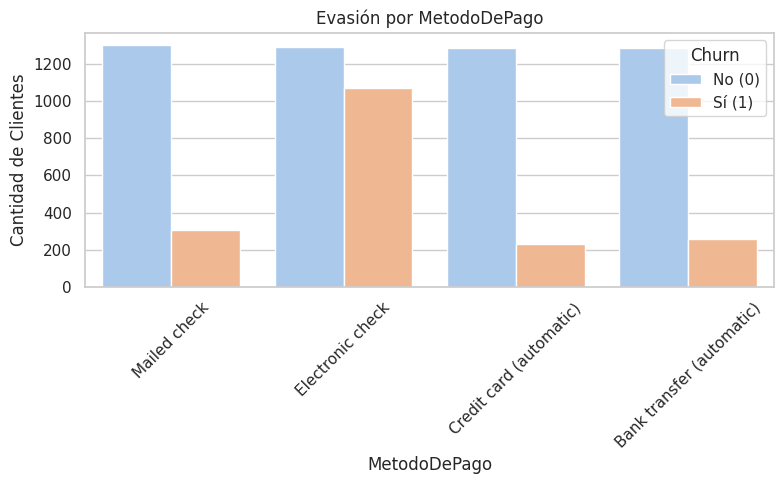

In [21]:
# Grafica de Church por variables relevantes
# Seleccionamos variables categóricas relevantes
categoricas = ['Genero', 'TipoContrato', 'MetodoDePago']

# Graficamos cada una
for col in categoricas:
    plt.figure(figsize=(8, 5))
    sns.countplot(data=df2, x=col, hue='Churn', palette='pastel')
    plt.title(f'Evasión por {col}')
    plt.xticks(rotation=45)
    plt.xlabel(col)
    plt.ylabel('Cantidad de Clientes')
    plt.legend(title='Churn', labels=['No (0)', 'Sí (1)'])
    plt.tight_layout()
    plt.show()

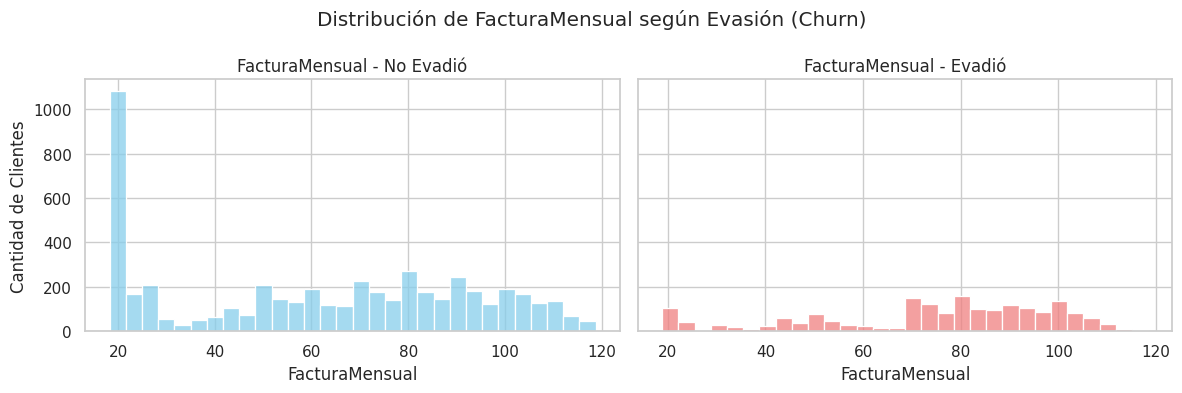

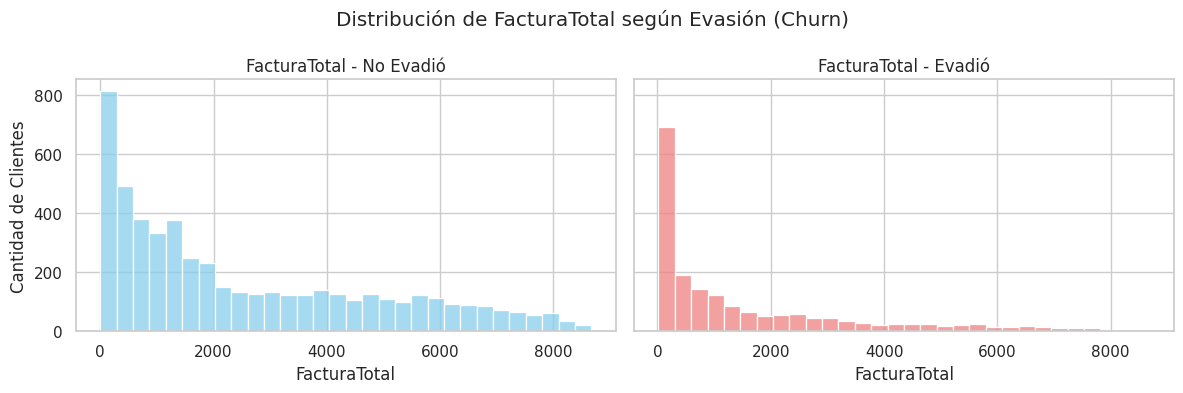

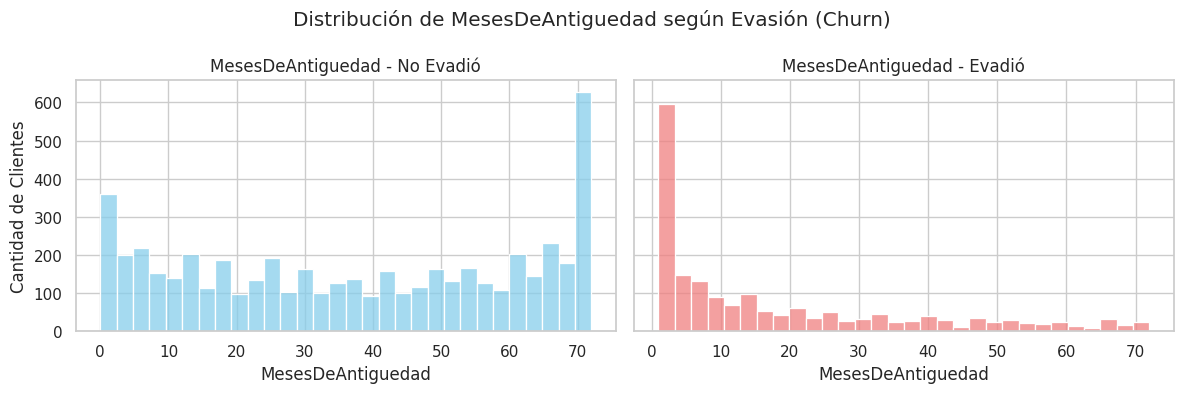

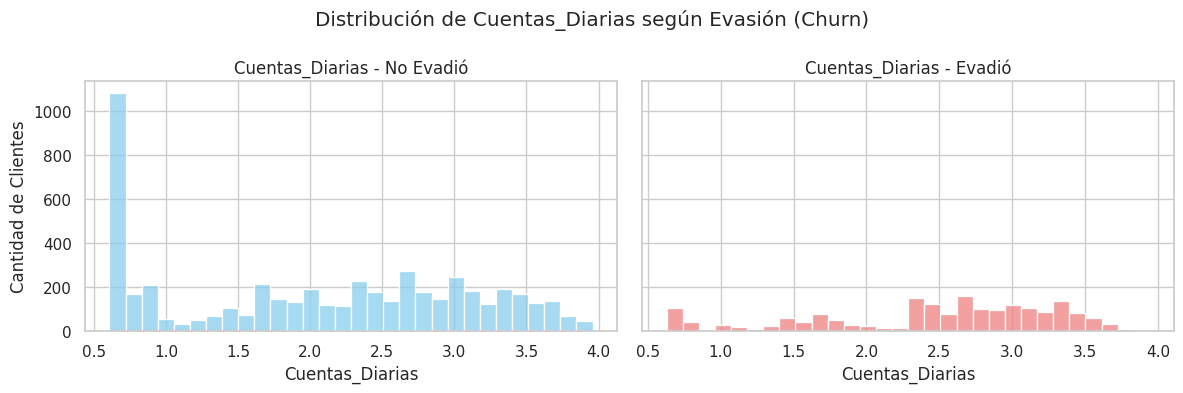

In [22]:

#Histrograma comparativo

import matplotlib.pyplot as plt
import seaborn as sns

# Estilo general
sns.set(style="whitegrid")
plt.rcParams['figure.figsize'] = (10, 5)

# Variables a analizar
variables = ['FacturaMensual', 'FacturaTotal', 'MesesDeAntiguedad', 'Cuentas_Diarias']

# Crear histogramas comparativos
for var in variables:
    fig, axes = plt.subplots(1, 2, figsize=(12, 4), sharey=True)

    # Clientes que no evadieron (Churn = 0)
    sns.histplot(df2[df2['Churn'] == 0][var], bins=30, ax=axes[0], color='skyblue')
    axes[0].set_title(f'{var} - No Evadió')
    axes[0].set_xlabel(var)
    axes[0].set_ylabel('Cantidad de Clientes')

    # Clientes que sí evadieron (Churn = 1)
    sns.histplot(df2[df2['Churn'] == 1][var], bins=30, ax=axes[1], color='lightcoral')
    axes[1].set_title(f'{var} - Evadió')
    axes[1].set_xlabel(var)

    # Título general del gráfico
    fig.suptitle(f'Distribución de {var} según Evasión (Churn)')
    plt.tight_layout()
    plt.show()



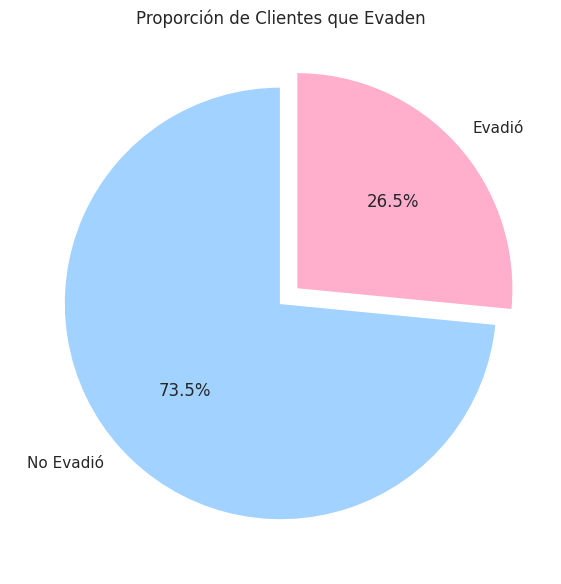

In [23]:
# Gráfico de pastel
plt.figure(figsize=(6, 6))
df2['Churn'].value_counts().plot.pie(
    autopct='%1.1f%%',
    labels=['No Evadió', 'Evadió'],
    colors=['#a2d2ff', '#ffafcc'],
    startangle=90,
    explode=(0, 0.1)
)
plt.title('Proporción de Clientes que Evaden')
plt.ylabel('')
plt.tight_layout()
plt.show()


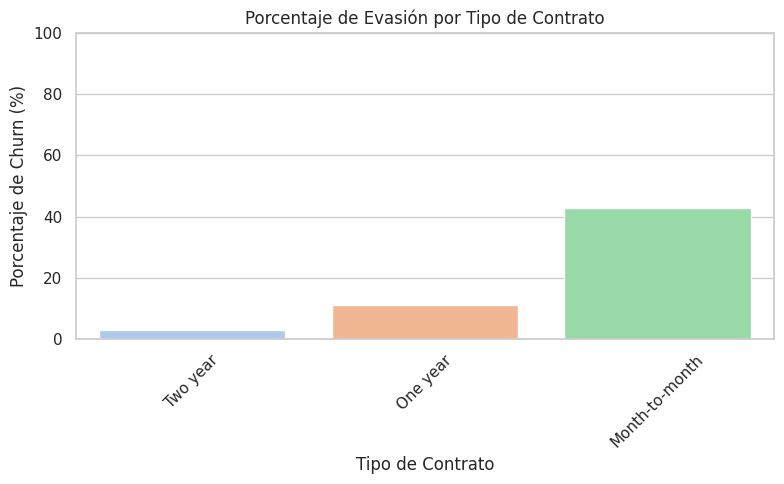

In [24]:
# Porcentaje de churn por tipo de contrato
porcentajes = df2.groupby('TipoContrato')['Churn'].mean().sort_values() * 100
porcentajes_df = porcentajes.reset_index()
porcentajes_df.columns = ['TipoContrato', 'ChurnRate']

plt.figure(figsize=(8, 5))
sns.barplot(data=porcentajes_df, x='TipoContrato', y='ChurnRate', hue='TipoContrato', palette='pastel', legend=False)
plt.title('Porcentaje de Evasión por Tipo de Contrato')
plt.ylabel('Porcentaje de Churn (%)')
plt.xlabel('Tipo de Contrato')
plt.ylim(0, 100)
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()



<ipython-input-25-1236779607>:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=porcentaje_pago.index, y=porcentaje_pago.values, palette='pastel')


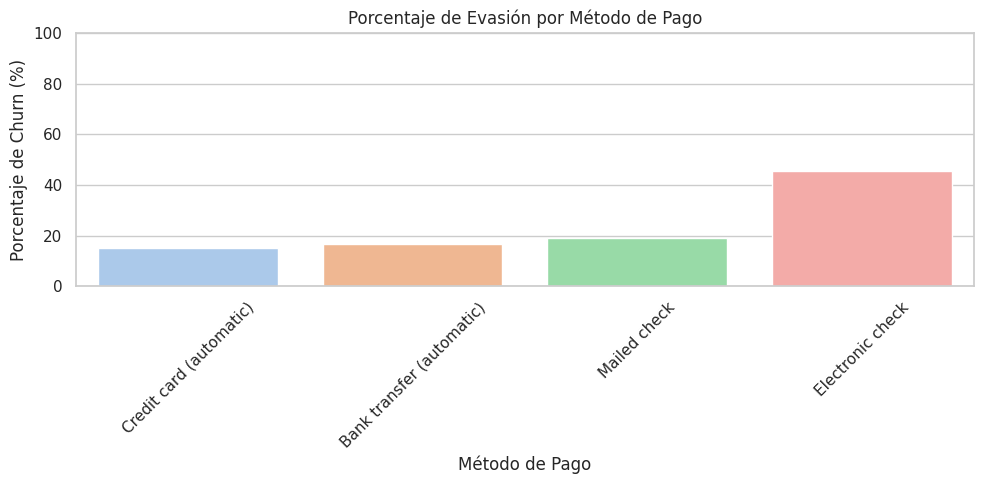

In [25]:
# Porcentaje de churn por método de pago
plt.figure(figsize=(10, 5))
porcentaje_pago = df2.groupby('MetodoDePago')['Churn'].mean().sort_values() * 100
sns.barplot(x=porcentaje_pago.index, y=porcentaje_pago.values, palette='pastel')
plt.title('Porcentaje de Evasión por Método de Pago')
plt.ylabel('Porcentaje de Churn (%)')
plt.xlabel('Método de Pago')
plt.ylim(0, 100)
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


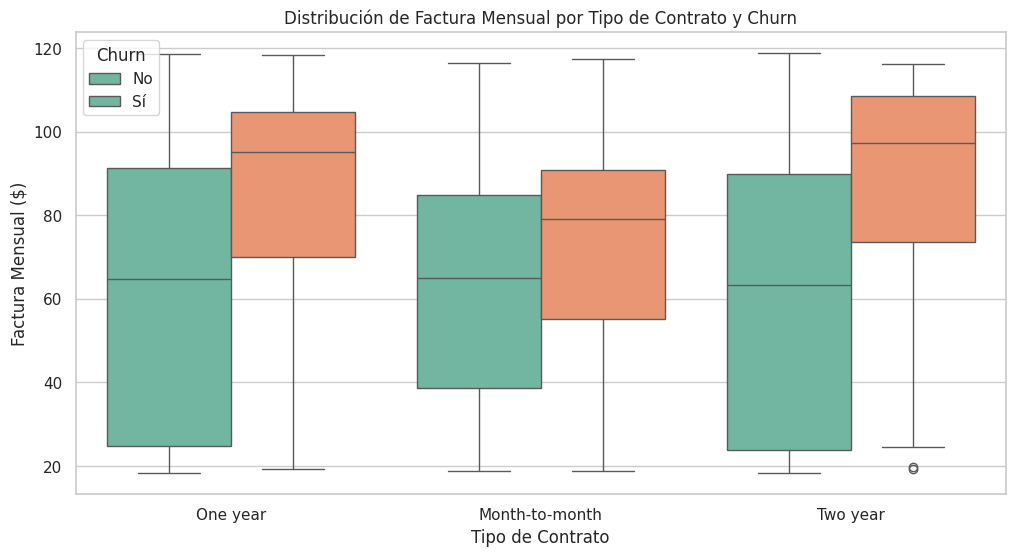

In [26]:
# Boxplot de FacturaMensual por Churn y TipoContrato
plt.figure(figsize=(12,6))
sns.boxplot(data=df2, x='TipoContrato', y='FacturaMensual', hue='Churn', palette='Set2')
plt.title('Distribución de Factura Mensual por Tipo de Contrato y Churn')
plt.ylabel('Factura Mensual ($)')
plt.xlabel('Tipo de Contrato')
plt.legend(title='Churn', labels=['No', 'Sí'])
plt.show()

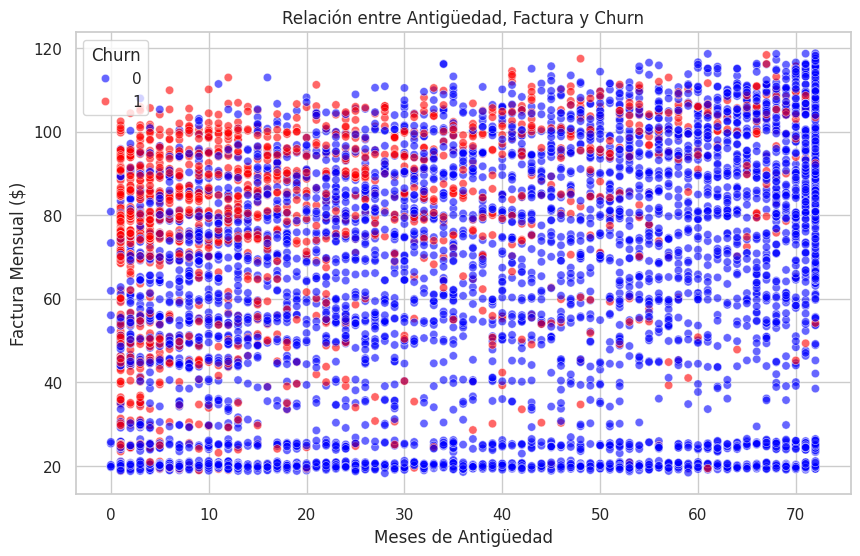

In [27]:
#Gráfico de dispersión Antigüedad vs Factura con Churn
plt.figure(figsize=(10,6))
sns.scatterplot(data=df2, x='MesesDeAntiguedad', y='FacturaMensual', hue='Churn',
                palette={0:'blue', 1:'red'}, alpha=0.6)
plt.title('Relación entre Antigüedad, Factura y Churn')
plt.xlabel('Meses de Antigüedad')
plt.ylabel('Factura Mensual ($)')
plt.show()

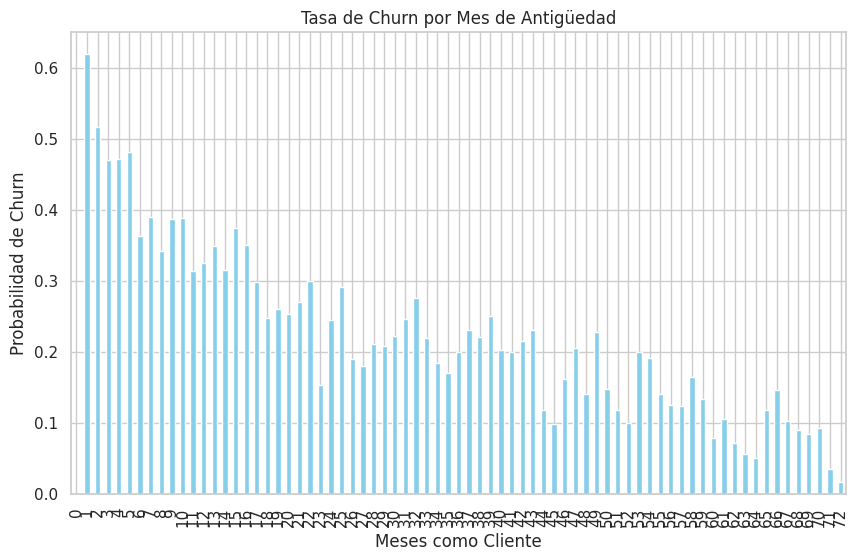

In [28]:
# Análisis de supervivencia (qué % abandona cada mes)
plt.figure(figsize=(10,6))
df2.groupby('MesesDeAntiguedad')['Churn'].mean().plot(kind='bar', color='skyblue')
plt.title('Tasa de Churn por Mes de Antigüedad')
plt.xlabel('Meses como Cliente')
plt.ylabel('Probabilidad de Churn')
plt.show()

In [29]:
# Segmentación de clientes de riesgo
df2['RiesgoChurn'] = np.where(
    (df2['TipoContrato'] == 'Month-to-month') &
    (df2['MesesDeAntiguedad'] < 3) &
    (df2['FacturaMensual'] > df2['FacturaMensual'].median()),
    'Alto Riesgo', 'Bajo Riesgo')

print(df2['RiesgoChurn'].value_counts(normalize=True)*100)

RiesgoChurn
Bajo Riesgo    96.166406
Alto Riesgo     3.833594
Name: proportion, dtype: float64


In [30]:
# Punto donde la probabilidad de Churn supera el 50%
umbral_antiguedad = df2.groupby('MesesDeAntiguedad')['Churn'].mean().idxmax()
print(f"Los clientes con menos de {umbral_antiguedad} meses tienen mayor riesgo")

Los clientes con menos de 1 meses tienen mayor riesgo


##Extra. Análisis de correlación entre variables

Como un paso adicional, puedes explorar la correlación entre diferentes variables del dataset. Esto puede ayudar a identificar qué factores tienen mayor relación con la evasión de clientes, como:
* 🔹 La relación entre la cuenta diaria y la evasión.
* 🔹 Cómo la cantidad de servicios contratados afecta la probabilidad de churn.

Puedes usar la función corr() de Pandas para calcular las correlaciones y visualizar los resultados con gráficos de dispersión o matrices de correlación.

Este análisis adicional puede proporcionar insights valiosos para la creación de modelos predictivos más robustos. 🚀


Los valores cercanos a +1 o -1 indican correlaciones fuertes.


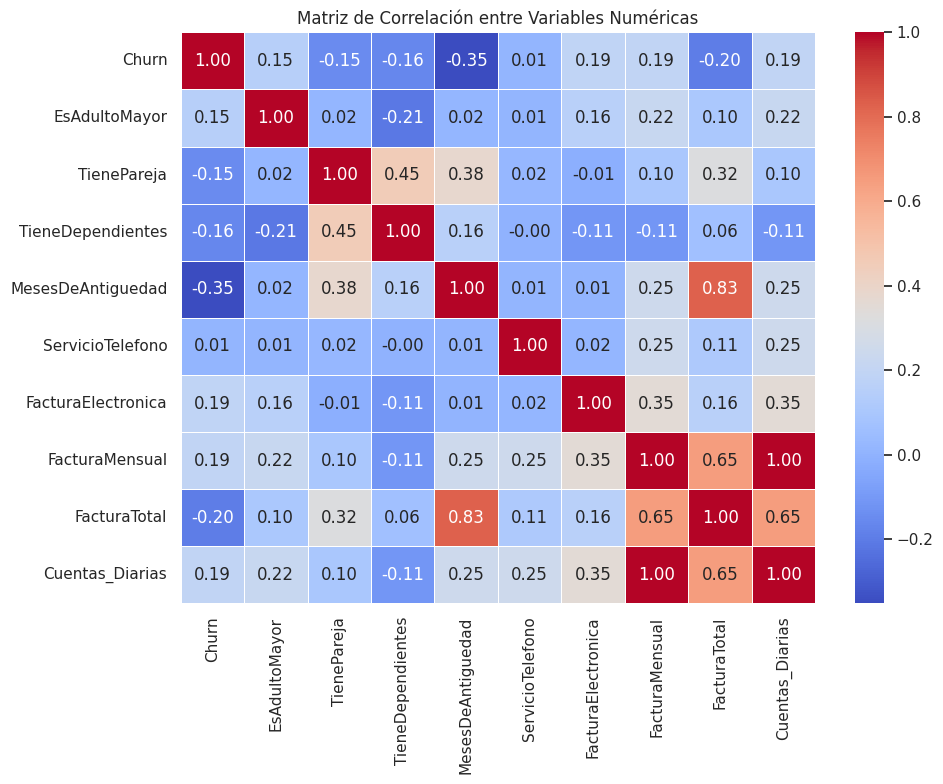

In [31]:
# Matriz de correlación entre variables numéricas

# Seleccionamos solo columnas numéricas relevantes
corr_matrix = df2.corr(numeric_only=True)
print("Los valores cercanos a +1 o -1 indican correlaciones fuertes.")

# Visualizamos la matriz como un mapa de calor
plt.figure(figsize=(10, 8))
sns.heatmap(corr_matrix, annot=True, fmt='.2f', cmap='coolwarm', linewidths=0.5)
plt.title('Matriz de Correlación entre Variables Numéricas')
plt.tight_layout()
plt.show()

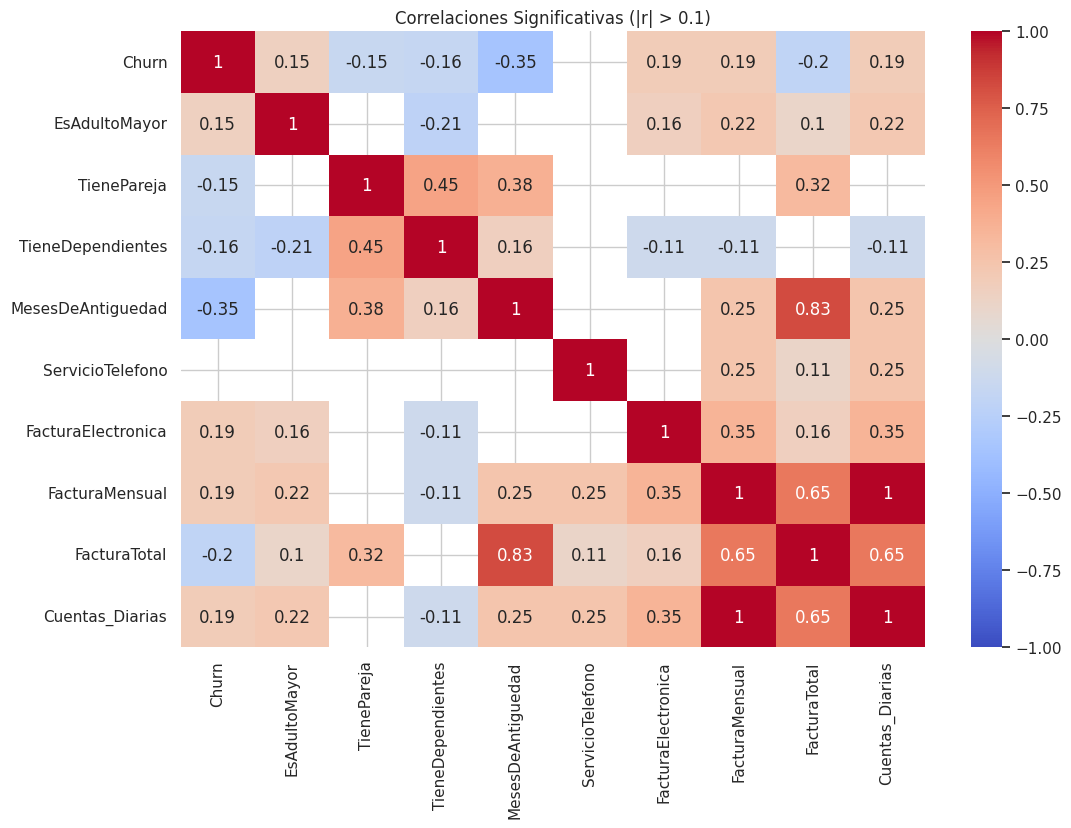

In [32]:
plt.figure(figsize=(12,8))
sns.heatmap(corr_matrix[corr_matrix.abs() > 0.1], annot=True, cmap='coolwarm', vmin=-1, vmax=1)
plt.title('Correlaciones Significativas (|r| > 0.1)')
plt.show()

In [33]:
# Correlación de todas las variables con "Churn"

# Extraer las correlaciones con la variable objetivo "Churn"
correlaciones_churn = corr_matrix['Churn'].drop('Churn').sort_values(ascending=False)

# Mostrar en pantalla
print("Variables más correlacionadas con Evasión (Churn):")
print(correlaciones_churn)
print("\nLas variables con valores positivos están asociadas a mayor evasión, y las negativas a menor evasión.")

Variables más correlacionadas con Evasión (Churn):
FacturaMensual        0.193356
Cuentas_Diarias       0.193356
FacturaElectronica    0.191825
EsAdultoMayor         0.150889
ServicioTelefono      0.011942
TienePareja          -0.150448
TieneDependientes    -0.164221
FacturaTotal         -0.198324
MesesDeAntiguedad    -0.352229
Name: Churn, dtype: float64

Las variables con valores positivos están asociadas a mayor evasión, y las negativas a menor evasión.


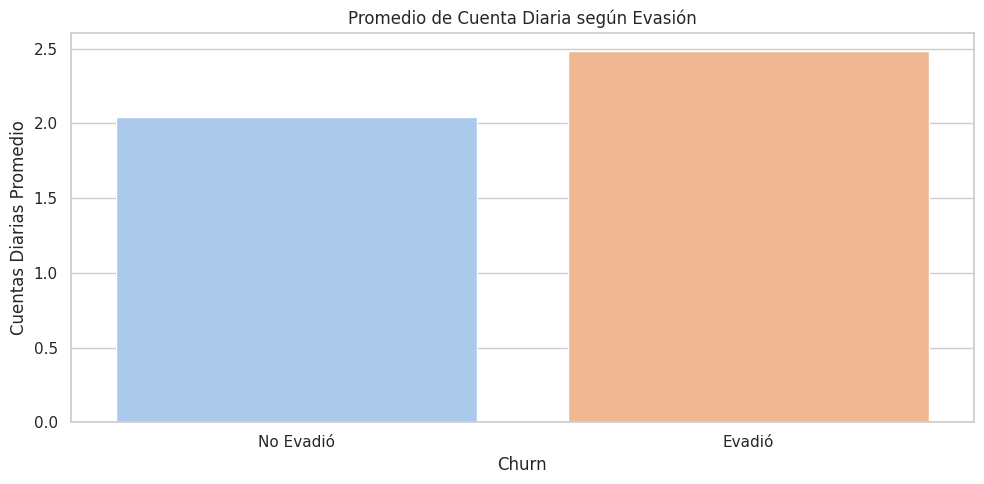

In [34]:
#Promedio de Cuentas Diarias por Churn
# Calcular promedios por grupo
promedios_cuentas = df2.groupby('Churn')['Cuentas_Diarias'].mean().reset_index()

# Graficar
sns.barplot(data=promedios_cuentas, x='Churn', y='Cuentas_Diarias', hue='Churn', legend=False, palette='pastel')
plt.title('Promedio de Cuenta Diaria según Evasión')
plt.xticks([0, 1], ['No Evadió', 'Evadió'])
plt.xlabel('Churn')
plt.ylabel('Cuentas Diarias Promedio')
plt.tight_layout()
plt.show()


In [35]:

# Lista de columnas de servicios activos
servicios = [
    'ProteccionDispositivo', 'SoporteTecnico',
    'TelevisionPorCable', 'StreamingPeliculas'
]

# Convertir a 0/1 que aún están como texto
for col in servicios:
    df2[col] = df2[col].replace({'Yes': 1, 'No': 0, 'No internet service': 0})

# Crear la columna TotalServicios
df2['TotalServicios'] = df2[servicios].sum(axis=1)

df2.head()

<ipython-input-35-90908071>:9: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  df2[col] = df2[col].replace({'Yes': 1, 'No': 0, 'No internet service': 0})


,ID_Cliente,Churn,Genero,EsAdultoMayor,TienePareja,TieneDependientes,MesesDeAntiguedad,ServicioTelefono,MultiplesLineasTelefono,TipoInternet,...,TelevisionPorCable,StreamingPeliculas,TipoContrato,FacturaElectronica,MetodoDePago,FacturaMensual,FacturaTotal,Cuentas_Diarias,RiesgoChurn,TotalServicios
0,0002-ORFBO,0,Female,0,1,1,9,1,No,DSL,...,1,0,One year,1,Mailed check,65.6,593.30,2.186667,Bajo Riesgo,2
1,0003-MKNFE,0,Male,0,0,0,9,1,Yes,DSL,...,0,1,Month-to-month,0,Mailed check,59.9,542.40,1.996667,Bajo Riesgo,1
2,0004-TLHLJ,1,Male,0,0,0,4,1,No,Fiber optic,...,0,0,Month-to-month,1,Electronic check,73.9,280.85,2.463333,Bajo Riesgo,1
3,0011-IGKFF,1,Male,1,1,0,13,1,No,Fiber optic,...,1,1,Month-to-month,1,Electronic check,98.0,1237.85,3.266667,Bajo Riesgo,3
4,0013-EXCHZ,1,Female,1,1,0,3,1,No,Fiber optic,...,1,0,Month-to-month,1,Mailed check,83.9,267.40,2.796667,Bajo Riesgo,2


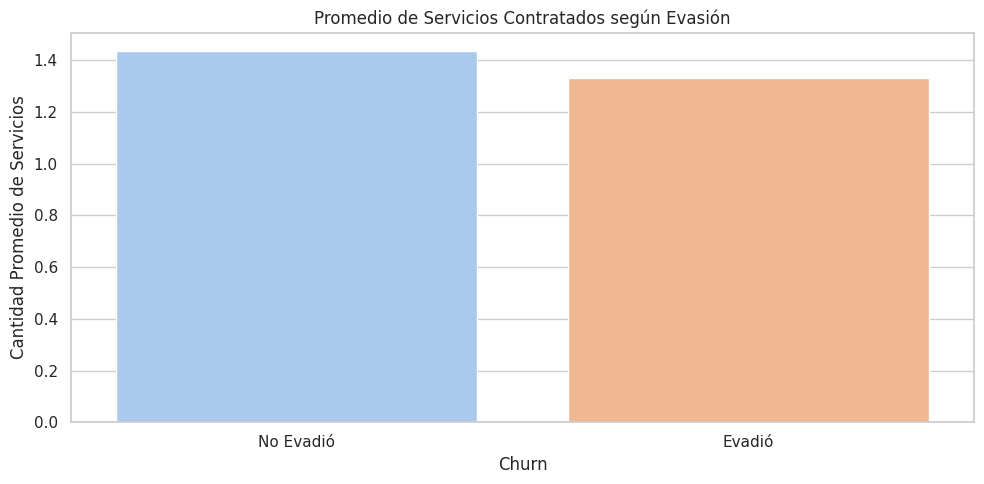

In [36]:
# Calcular promedios por grupo
promedios_servicios = df2.groupby('Churn')['TotalServicios'].mean().reset_index()

# Graficar
sns.barplot(
    data=promedios_servicios,
    x='Churn',
    y='TotalServicios',
    hue='Churn',
    palette='pastel',
    legend=False
)
plt.title('Promedio de Servicios Contratados según Evasión')
plt.xticks([0, 1], ['No Evadió', 'Evadió'])
plt.xlabel('Churn')
plt.ylabel('Cantidad Promedio de Servicios')
plt.tight_layout()
plt.show()


In [37]:
df_alerta = df2[(df2['TipoContrato'] == 'Month-to-month') &
               (df2['TotalServicios'] < 2) &
               (df2['FacturaMensual'] > 80)]
print(f"Clientes en riesgo: {len(df_alerta)}")

Clientes en riesgo: 493


##📄Informe final

###🔹 1. Introducción
El presente análisis tiene como objetivo principal entender los factores que influyen en la evasión de clientes (Churn) en la empresa Telecom X. La evasión representa una pérdida directa de ingresos y puede estar asociada a múltiples factores, como la calidad del servicio, el tipo de contrato, el método de pago o el nivel de compromiso del cliente.

Mediante el uso de técnicas de análisis exploratorio de datos y visualización, se busca identificar patrones y tendencias que permitan predecir y reducir la evasión, ayudando a diseñar estrategias de retención más efectivas.

###🔹 2. Limpieza y Tratamiento de Datos
Para garantizar la calidad del análisis, se realizó un proceso completo de limpieza y transformación de datos:

✅ Importación de datos desde un archivo JSON alojado en GitHub.

✅ Estructuración del JSON con json_normalize para aplanar jerarquías.

✅ Conversión de tipos, como Charges_Total a numérico y Churn a binario (1 = evadió, 0 = no evadió).

✅ Eliminación de duplicados y manejo de valores nulos.

✅ Creación de nuevas variables, como:

Cuentas_Diarias: valor diario estimado del gasto del cliente.

TotalServicios: número total de servicios contratados por cada cliente.

Además, se renombraron las columnas con nombres más legibles y representativos.

###🔹 3. Análisis Exploratorio de Datos (EDA)
Se realizaron diversos análisis visuales para explorar la relación entre la evasión y diferentes características del cliente.

📌 Distribución de Evasión
Aproximadamente 26% de los clientes han evadido el servicio.

El gráfico de torta mostró una proporción clara entre los clientes leales y los que se dieron de baja.

📌 Variables categóricas
Los clientes con contratos mensuales muestran tasas de evasión significativamente más altas que los contratos anuales.

Algunos métodos de pago electrónicos (como débito automático) presentan mayor evasión que otros.

📌 Variables numéricas
Los clientes que evaden tienen, en promedio, facturas mensuales más altas.

Se observó que los clientes nuevos (con poca antigüedad) tienen tasas de evasión mayores.

Menor cantidad de servicios contratados se asocia con una mayor probabilidad de churn.

📌 Correlaciones
Se calculó la matriz de correlación para todas las variables numéricas.

Las variables más correlacionadas con Churn fueron:

* Cuentas_Diarias (positiva)
* MesesDeAntiguedad (negativa)
* TotalServicios (negativa)




###🔹 4. Conclusiones e Insights
Los clientes con contratos mensuales, pocas líneas de servicio, y facturación más alta son significativamente más propensos a abandonar la empresa.

Existe una relación directa entre el número de servicios contratados y la retención: los clientes que usan más servicios tienden a quedarse.

La antigüedad del cliente también es un fuerte indicador: los más nuevos son más volátiles.

Ciertos métodos de pago podrían estar asociados a experiencias menos satisfactorias.



###🔹 5. Recomendaciones Estratégicas
* Incentivar contratos a largo plazo.
Ofrecer descuentos o beneficios a clientes con contratos mensuales para migrarlos a planes anuales.
* Fomentar la contratación de más servicios.
Diseñar bundles o paquetes personalizados que aumenten el número de servicios por cliente.
* Campañas de fidelización temprana.
Dirigir programas de onboarding, soporte o promociones a los clientes más nuevos (0–6 meses).
* Monitorear métodos de pago asociados a mayor churn.
Analizar si ciertos métodos presentan más quejas o inconvenientes y mejorarlos.
* Establecer alertas tempranas.
Utilizar variables como Cuentas_Diarias, TotalServicios y MesesDeAntiguedad para crear un modelo predictivo de evasión.

##Visualizaciones clave

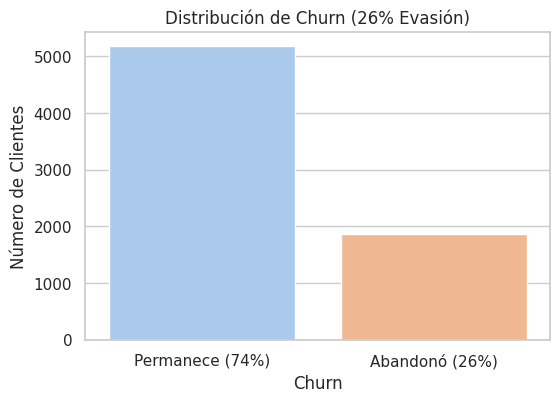

In [38]:
#Distribución de Churn (26% de abandono)
plt.figure(figsize=(6,4))
sns.countplot(data=df2, x='Churn', hue='Churn', palette='pastel', legend=False)
plt.title('Distribución de Churn (26% Evasión)')
plt.xticks([0,1], ['Permanece (74%)', 'Abandonó (26%)'])
plt.ylabel('Número de Clientes')
plt.show()

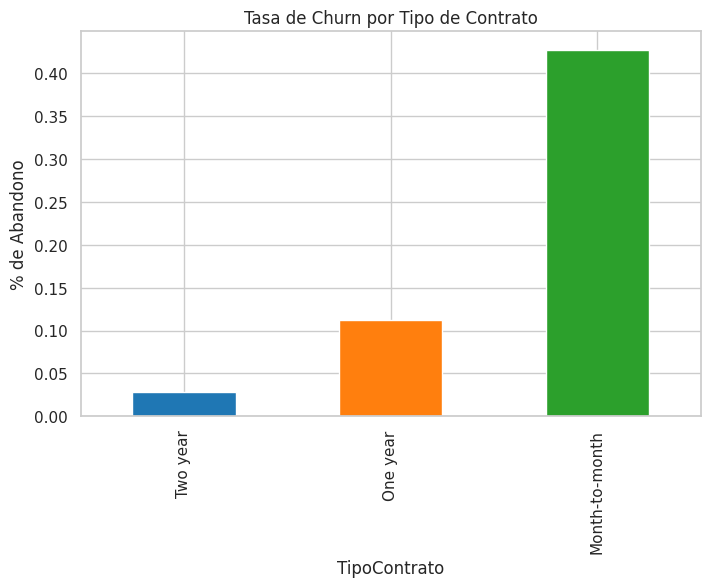

In [39]:
#Impacto del Tipo de Contrato
contrato_churn = df2.groupby('TipoContrato')['Churn'].mean().sort_values()
plt.figure(figsize=(8,5))
contrato_churn.plot(kind='bar', color=['#1f77b4','#ff7f0e','#2ca02c'])
plt.title('Tasa de Churn por Tipo de Contrato')
plt.ylabel('% de Abandono')
plt.show()

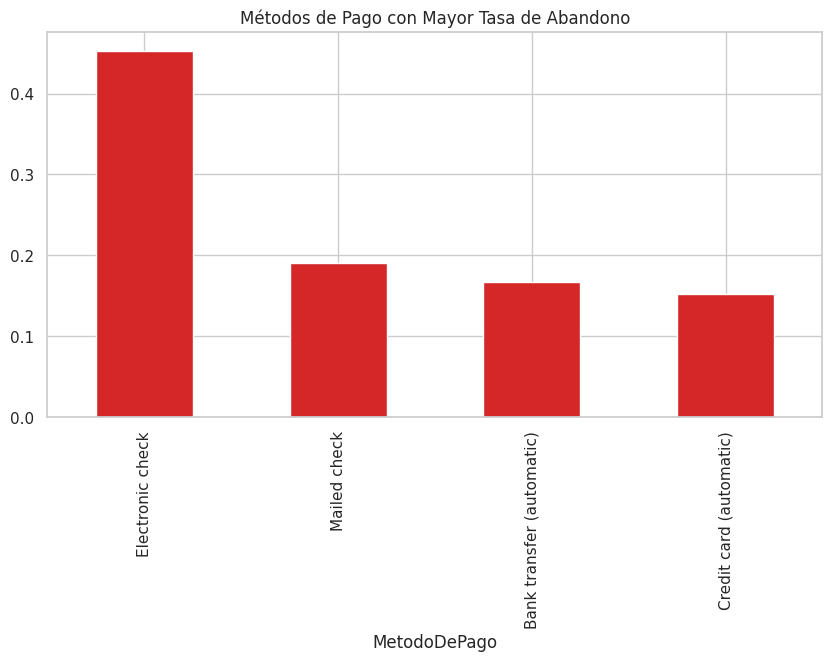

In [40]:
#Método de Pago con Mayor Churn
pago_churn = df2.groupby('MetodoDePago')['Churn'].mean().sort_values(ascending=False)
plt.figure(figsize=(10,5))
pago_churn.plot(kind='bar', color='#d62728')
plt.title('Métodos de Pago con Mayor Tasa de Abandono')
plt.show()

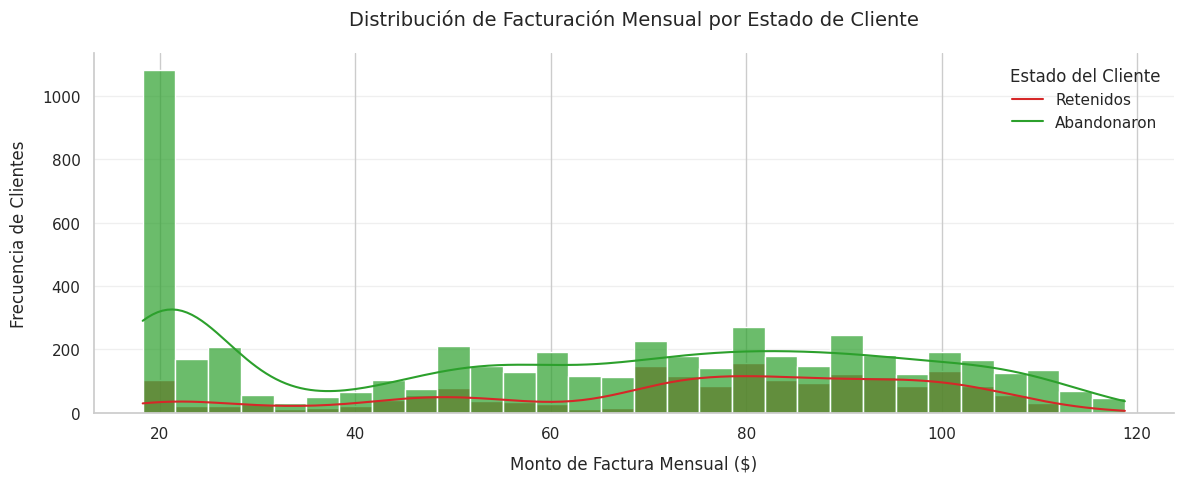

In [41]:
#Relación Facturación vs Churn
plt.figure(figsize=(12,5))
ax = sns.histplot(data=df2, x='FacturaMensual', hue='Churn',
                 bins=30, kde=True,
                 palette=['#2ca02c','#d62728'],  # Verde para retenidos, rojo para abandonos
                 alpha=0.7)  # Mayor transparencia para mejor visualización

plt.title('Distribución de Facturación Mensual por Estado de Cliente', pad=20, fontsize=14)
plt.xlabel('Monto de Factura Mensual ($)', fontsize=12, labelpad=10)
plt.ylabel('Frecuencia de Clientes', fontsize=12, labelpad=10)

# Mejorar la leyenda
plt.legend(title='Estado del Cliente',
           labels=['Retenidos', 'Abandonaron'],
           frameon=False)

# Ajustes estéticos
sns.despine()
plt.grid(axis='y', alpha=0.3)
plt.tight_layout()

plt.show()

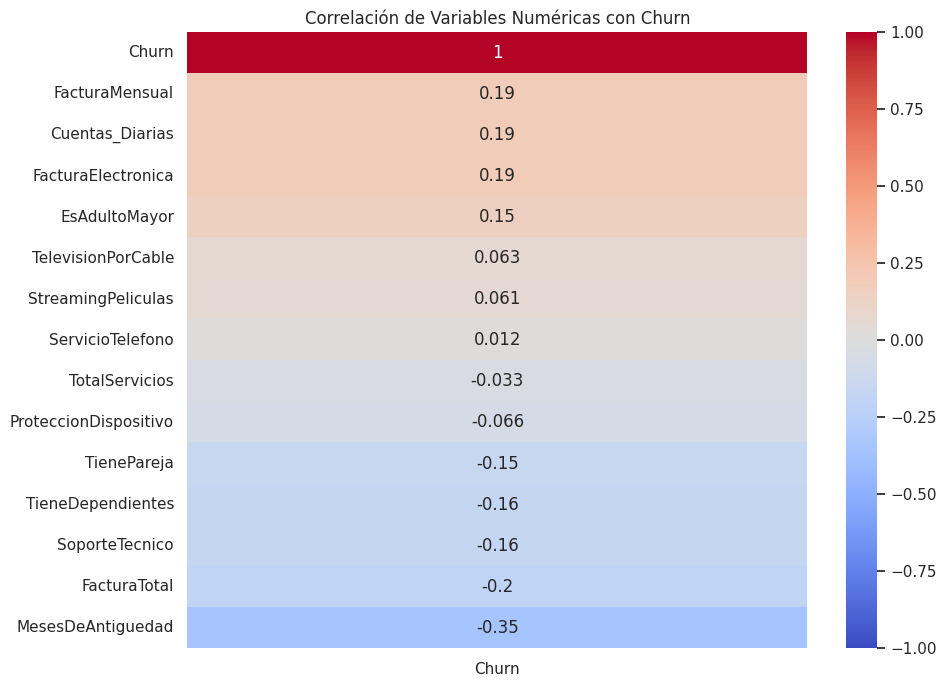

In [42]:
#Correlaciones Clave

# Seleccionar solo columnas numéricas antes de calcular la correlación
numeric_df = df2.select_dtypes(include=np.number)

# Calcular la matriz de correlación solo para las columnas numéricas
corr_matrix_numeric = numeric_df.corr()

plt.figure(figsize=(10,8))
# Usar la matriz de correlación de las columnas numéricas
sns.heatmap(corr_matrix_numeric[['Churn']].sort_values('Churn', ascending=False),
            annot=True, cmap='coolwarm', vmin=-1, vmax=1)
plt.title('Correlación de Variables Numéricas con Churn')
plt.show()

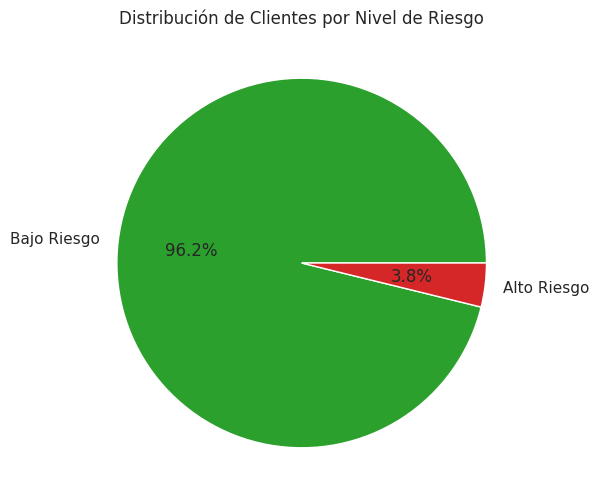

In [43]:
#Segmentación de Riesgo
plt.figure(figsize=(6,6))
data = df2['RiesgoChurn'].value_counts(normalize=True)
plt.pie(data,
        labels=['Bajo Riesgo','Alto Riesgo'],
        colors=['#2ca02c','#d62728'],
        autopct='%1.1f%%')
plt.title('Distribución de Clientes por Nivel de Riesgo')
plt.show()